In [ ]:
import pandas as pd
# read finance data from csv
finance_data = pd.read_csv('/content/drive/MyDrive/CIS 606/finance_data.csv')
# read text data from csv
text_data = pd.read_csv('/content/drive/MyDrive/CIS 606/text_data.csv')

# look at the data sample
finance_data.head()
text_data.head()

,ticker,year,quarter,total_word_count,neg,neu,pos,compound
0,SWKS,2022,q1,5408,0.013799,0.794847,0.191359,0.266350
1,CVS,2022,q1,7238,0.011254,0.823173,0.165576,0.294958
2,VNO,2022,q1,8400,0.014297,0.881848,0.103842,0.185106
3,BMY,2022,q1,8107,0.012447,0.816974,0.170585,0.266373
4,LVS,2022,q1,4458,0.021880,0.787235,0.190891,0.206733


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Question 1: If a row in finance_data has null sic_two_digit, that means the financial data could not be effectively extracted from the database. Write code to remove the rows in finance_data if sic_two_digit is null.**

In [ ]:
finance_data = finance_data.dropna(subset=['sic_two_digit'])
print(finance_data.head())

  ticker  year quarter  sic_two_digit    sales  revenue  net_income  \
0    AAL  2022      q1           45.0   8899.0   8899.0     -1635.0   
1    ADM  2022      q1           20.0  23650.0  23650.0      1054.0   
2    ADP  2022      q1           73.0   3832.3   3832.3       700.5   
3   ADSK  2022      q1           73.0   1170.0   1170.0       146.0   
4    AIG  2022      q1           63.0  14966.0  14966.0      4173.0   

   total_assets  
0       67401.0  
1       64866.0  
2       59987.2  
3        8261.0  
4      573513.0  


**Question 2: After we describe the data, we notice that the revenue column has remaining null values. Write code to fill the null values in revenue with the average of non-null revenue values.**

In [ ]:
average_revenue = finance_data['revenue'].mean()
finance_data['revenue'].fillna(average_revenue, inplace=True)
print(average_revenue)
print(finance_data.head())

8477.400159574468
  ticker  year quarter  sic_two_digit    sales  revenue  net_income  \
0    AAL  2022      q1           45.0   8899.0   8899.0     -1635.0   
1    ADM  2022      q1           20.0  23650.0  23650.0      1054.0   
2    ADP  2022      q1           73.0   3832.3   3832.3       700.5   
3   ADSK  2022      q1           73.0   1170.0   1170.0       146.0   
4    AIG  2022      q1           63.0  14966.0  14966.0      4173.0   

   total_assets  
0       67401.0  
1       64866.0  
2       59987.2  
3        8261.0  
4      573513.0  


**Question 3: After further examination of the data, we find that there is a wrong entry in the ticker column. Write code to replace the ticker which equals 'BFB' to 'BF.B' in text_data.**

In [ ]:
text_data['ticker'] = text_data['ticker'].replace('BFB', 'BF.B')


**Question 4: Write code to identify the row(s) in text_data whose ticker is not in finance_data.**

In [ ]:
not_in_finance_data = text_data[~text_data['ticker'].isin(finance_data['ticker'])]
print(not_in_finance_data)

   ticker  year quarter  total_word_count       neg       neu       pos  \
33    FRC  2022      q1              8017  0.010314  0.811126  0.178553   

    compound  
33  0.281495  


**Question 5: Write code to merge finance_data and text_data on three columns: ticker, year, and quarter. Name the merged DataFrame "merged_data".**

*Hint: If two rows in finance_data and text_data have equal values on all of the three fields (i.e., ticker, year, and quarter), we merge the rows.*

In [ ]:
merged_data = pd.merge(finance_data, text_data, on=['ticker', 'year', 'quarter'])
print(merged_data)

   ticker  year quarter  sic_two_digit      sales      revenue  net_income  \
0     AAL  2022      q1           45.0   8899.000   8899.00000   -1635.000   
1     ADM  2022      q1           20.0  23650.000  23650.00000    1054.000   
2     ADP  2022      q1           73.0   3832.300   3832.30000     700.500   
3    ADSK  2022      q1           73.0   1170.000   1170.00000     146.000   
4     AIG  2022      q1           63.0  14966.000  14966.00000    4173.000   
..    ...   ...     ...            ...        ...          ...         ...   
94    WFC  2022      q1           60.0  18688.000   8477.40016    3788.000   
95    WRK  2022      q1           26.0   4952.200   4952.20000     182.300   
96    WST  2022      q1           30.0    720.000    720.00000     173.800   
97   WYNN  2022      q1           79.0    953.334    953.33400    -183.324   
98   ZION  2022      q1           60.0    697.000   8477.40016     203.000   

    total_assets  total_word_count       neg       neu       po

**Question 6: Write code to count the number of rows for each unique sic_two_digit in merged_data**

In [ ]:
sic_counts = merged_data['sic_two_digit'].value_counts()
print(sic_counts)

36.0    12
28.0    11
73.0    10
60.0     6
49.0     5
13.0     5
67.0     5
35.0     4
20.0     4
37.0     3
26.0     3
38.0     3
48.0     2
30.0     2
79.0     2
87.0     2
45.0     2
80.0     2
53.0     2
44.0     2
61.0     2
63.0     2
29.0     1
15.0     1
39.0     1
57.0     1
27.0     1
42.0     1
59.0     1
31.0     1
Name: sic_two_digit, dtype: int64


**Question 7: Add a new column labeled as industry to merged_data. If sic_two_digit is 36, industry equals 'Electronics'. If sic_two_digit is 28, industry equals 'Chemicals'. If sic_two_digit is 73, industry is 'Business Services'. For other sic_two_digit values, industry is 'Others'**

In [ ]:
# Create an empty list to store the industry values
industry_values = []

# Iterate through the 'sic_two_digit' column
for sic in merged_data['sic_two_digit']:
    if sic == 36:
        industry_values.append('Electronics')
    elif sic == 28:
        industry_values.append('Chemicals')
    elif sic == 73:
        industry_values.append('Business Services')
    else:
        industry_values.append('Others')

# Add the 'industry' column to the 'merged_data' DataFrame
merged_data['industry'] = industry_values

# The 'merged_data' DataFrame now has the 'industry' column based on the specified conditions using loops.
print(merged_data)

   ticker  year quarter  sic_two_digit      sales      revenue  net_income  \
0     AAL  2022      q1           45.0   8899.000   8899.00000   -1635.000   
1     ADM  2022      q1           20.0  23650.000  23650.00000    1054.000   
2     ADP  2022      q1           73.0   3832.300   3832.30000     700.500   
3    ADSK  2022      q1           73.0   1170.000   1170.00000     146.000   
4     AIG  2022      q1           63.0  14966.000  14966.00000    4173.000   
..    ...   ...     ...            ...        ...          ...         ...   
94    WFC  2022      q1           60.0  18688.000   8477.40016    3788.000   
95    WRK  2022      q1           26.0   4952.200   4952.20000     182.300   
96    WST  2022      q1           30.0    720.000    720.00000     173.800   
97   WYNN  2022      q1           79.0    953.334    953.33400    -183.324   
98   ZION  2022      q1           60.0    697.000   8477.40016     203.000   

    total_assets  total_word_count       neg       neu       po

**Question 8: Write code to answer the following question: for each industry (i.e., Electronics, Chemicals, Business Services and Others), what is the average revenue and average total_word_count?**

In [ ]:
# Group the data by the 'industry' column
industry_groups = merged_data.groupby('industry')

# Calculate and print the averages
for industry, group_data in industry_groups:
    avg_revenue = group_data['revenue'].mean()
    avg_word_count = group_data['total_word_count'].mean()
    print(f'Industry: {industry}, Average Revenue: {avg_revenue:.2f}, Average Total Word Count: {avg_word_count:.2f}')

Industry: Business Services, Average Revenue: 3110.75, Average Total Word Count: 6324.90
Industry: Chemicals, Average Revenue: 7030.80, Average Total Word Count: 7960.55
Industry: Electronics, Average Revenue: 4168.83, Average Total Word Count: 7508.17
Industry: Others, Average Revenue: 10315.01, Average Total Word Count: 7438.38


**Question 9: Write code to answer the following question: what is the correlation between a company's return on asset and its compound sentiment score?**

*Hint: Return on asset is net income divided by total assets.*

In [ ]:
merged_data['return_on_asset'] = merged_data['net_income'] / merged_data['total_assets']
correlation = merged_data['return_on_asset'].corr(merged_data['compound'])
print(f'Correlation between ROA and Sentiment Score: {correlation:.2f}')

Correlation between ROA and Sentiment Score: 0.02


**Question 10: Plot a scatter plot with return on asset and compound sentiment score on the x-axis and y-axis, respectively. Explain the pattern that you see in the plot.**

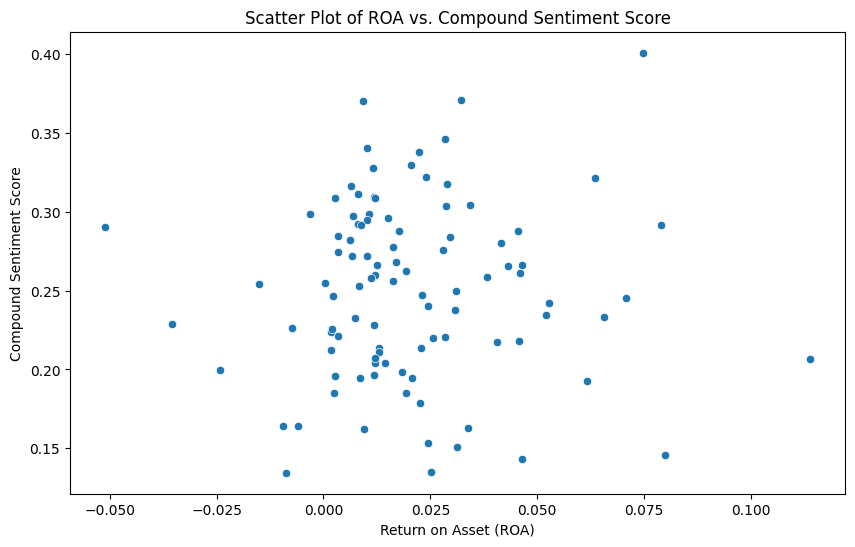

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='return_on_asset', y='compound', data=merged_data)

# Add labels and a title
plt.xlabel('Return on Asset (ROA)')
plt.ylabel('Compound Sentiment Score')
plt.title('Scatter Plot of ROA vs. Compound Sentiment Score')

# Show the plot
plt.show()